# Income Prediction with Supervised ML Random Forests

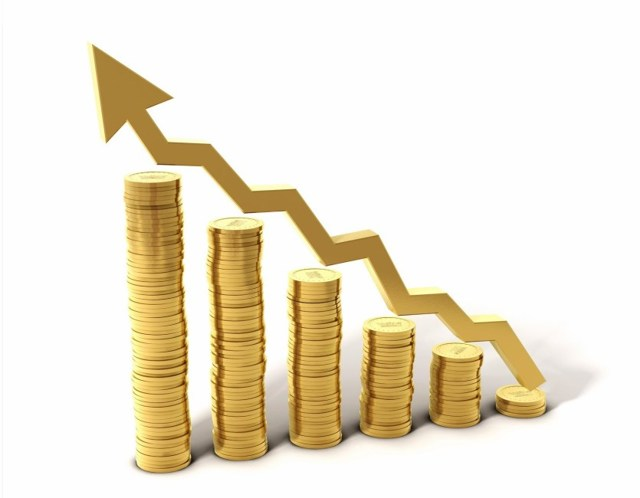

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## Download and Prepare the Data

In [14]:
income_data = pd.read_csv("income.csv", header = 0, delimiter = ", ", engine='python')
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
income_data["sex-int"] = income_data["sex"].apply(lambda row: 0 if row == "Male" else 1)

income_data["country-int"] = income_data["native-country"].apply(lambda row: 1 if row == "United-States" else 0)

## Defining Labels and Data

In [16]:
labels = income_data[["income"]]
data = income_data[["age", "capital-gain", "capital-loss", "hours-per-week", "sex-int", "country-int"]]

## Split into train and test 

In [17]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

In [21]:
train_data.shape

(24420, 6)

In [22]:
train_labels.shape

(24420, 1)

## Train the Data

In [26]:
forest = RandomForestClassifier(random_state=1)
forest.fit(train_data, train_labels)

C:\Users\KHRYST~1\AppData\Local\Temp/ipykernel_12496/1743433647.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_data, train_labels)


RandomForestClassifier(random_state=1)

## Print Results

In [27]:
print(forest.feature_importances_)
print(forest.score(test_data, test_labels))

[0.31520926 0.2918028  0.11552992 0.2047701  0.06395538 0.00873255]
0.823731728288908


## We've got 82% of accuracy of our model, which is good result.